<a href="https://colab.research.google.com/github/maandressa/Redes-Neurais/blob/main/PerceptronSklearnIris_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron Simples com Sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [ ]:
from sklearn import preprocessing # biblioteca para suporte ao pré-processamento
from sklearn.model_selection import train_test_split # biblioteca para separação de amostras para treino e teste
from sklearn.linear_model import Perceptron # biblioteca com funções para a execução da RNA Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics # biblioteca para obtenção de métricas para avaliação dos modelos
import matplotlib.pyplot as plt # biblioteca para plotar gráfico
import numpy as np
import pandas as pd
import random # biblioteca aplicada na geração de números randômicos
from google.colab import drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab

Mounted at /content/drive


In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/irisMLP.csv")

# separando a coluna da classe das 100 primeiras amostras do dataset
y = df.iloc[0:100, 4].values

# substituindo o valor string em numérico, baseado no que determina a função de ativação
y = np.where(y == 'Iris-setosa', -1, 1)

# separando as colunas com as variáveis das 100 primeiras amostras do dataset para determinar os inputs da RNA
X = df.iloc[0:100, [0,1,2,3]].values

print(y.shape)
print(X.shape)

(100,)
(100, 4)


In [ ]:
# normalização dos dados sklearn - dados entre 0 e 1 - https://pt.linux-console.net/?p=5847
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

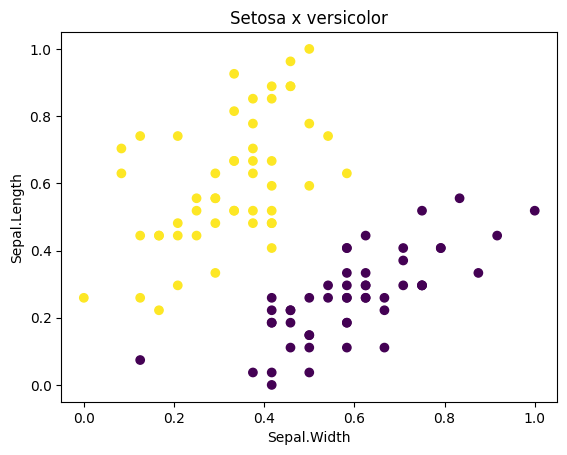

In [ ]:
# plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(X[:,1],X[:,0],c=y)
plt.title("Setosa x versicolor" )
plt.xlabel('Sepal.Width')
plt.ylabel('Sepal.Length')
plt.show

In [ ]:
# separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

print(X_train.shape)
print(y_train.shape)

(70, 4)
(70,)


In [ ]:
p = Perceptron(random_state=42, eta0=0.0001, alpha=0.1)
p.fit(X_train, y_train)

Perceptron(alpha=0.1, eta0=0.0001, random_state=42)

In [ ]:
predictions_train = p.predict(X_train) # validação do conjunto de amostras treinadas
train_score = accuracy_score(predictions_train, y_train) # avaliação de acurácia da classificação das amostras que foram apresentadas no treinamento
print("Acurácia com dados de treinamento: ", train_score)

predictions_test = p.predict(X_test) # validação do conjunto de amostras que não participaram do treinamento
train_score = accuracy_score(predictions_test, y_test) # avaliação de acurácia da classificação das amostras que foram apresentadas no treinamento
print("Acurácia com dados de treinamento: ", train_score)

print(classification_report(predictions_test, y_test))

print("Número de épocas no treinamento: ", p.n_iter_)
print("Lista de parâmetros configurados na Perceptron: ", p.get_params())

Acurácia com dados de treinamento:  1.0
Acurácia com dados de treinamento:  1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Número de épocas no treinamento:  6
Lista de parâmetros configurados na Perceptron:  {'alpha': 0.1, 'class_weight': None, 'early_stopping': False, 'eta0': 0.0001, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


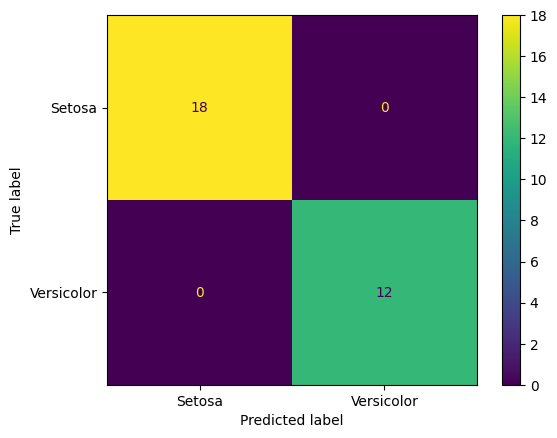

In [ ]:
# Apresentação gráfica da matriz de confusão dos testes classificados
conf_matrix = confusion_matrix(y_test, predictions_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Setosa', 'Versicolor'])
cm_display.plot()
plt.show()

In [ ]:
# Teste individual de amostras já normalizadas
A = np.array([0.4329,-1.3719,0.7022,-0.8535]) # Padrão correto = 1
A_y = np.array([1])
B = np.array([-0.3024,-0.2286,-0.8630,-2.7909]) # Padrão correto = -1
B_y = np.array([1])

prediction_A = p.predict([A])
prediction_B = p.predict([B])
print("Acurácia com dados de A: ", accuracy_score(prediction_A, A_y))
print("Acurária com dados de B: ", accuracy_score(prediction_B, B_y))

Acurácia com dados de A:  1.0
Acurária com dados de B:  0.0
